# 图像数据预处理通用代码框架

XX 2018.3.5

### 读取图像


1.import库和自有模块

In [1]:
import os
import random
import tensorflow as tf 
import matplotlib.pyplot as plt
from PIL import Image
from data_preprocess import *
from image_preprocess import *

2.处理路径文本，存储为数据库格式

In [ ]:
cwd = os.getcwd()

# 路径格式必须使用这种，否则api无法识别
pic_src = "E:/PROJECT/kaggle-seedling-classification/dataset/train/"

data_des = ["train.tfrecords", "test.tfrecords", "valid.tfrecords"]

train_num, test_num, valid_num, classes = data_preprocess(pic_src = pic_src, train_ratio = 0.95, 
                                                          pic_size = 224, data_des = data_des)

print(train_num)
print(test_num)
print(valid_num)
print(classes)

In [2]:
submit_pic_src = "E:/PROJECT/kaggle-seedling-classification/dataset/test/"

submit_img_num = submit_data_preprocess(submit_pic_src, pic_size = 224, data_des = "submit.tfrecords")

print(submit_img_num)

794


3.从tfrecord中读取图像和生成batch

In [3]:
train_img_batch, train_label_batch = get_batchs(tfrecord_filename = "train.tfrecords", image_size = 256, classes = classes,
                                                batch_size = 32, min_after_dequeue = 500)
test_img_batch, test_label_batch = get_batchs(tfrecord_filename = "test.tfrecords", image_size = 256, classes = classes,
                                              batch_size = test_num, min_after_dequeue = 500)
valid_img_batch, valid_label_batch = get_batchs(tfrecord_filename = "valid.tfrecords", image_size = 256, classes = classes,
                                                batch_size = valid_num, min_after_dequeue = 500)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    
    for i in range(10):
        train_imgs, train_labels= sess.run([train_img_batch, train_label_batch])
    
    test_imgs, test_labels= sess.run([test_img_batch, test_label_batch])
    valid_imgs, valid_labels= sess.run([valid_img_batch, valid_label_batch])
    
    print("done")
    
    coord.request_stop()
    coord.join(threads)

done


4.显示生成的batch和label

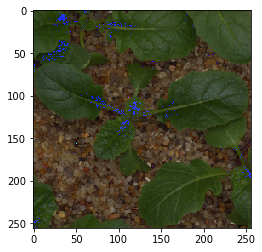

[[0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]]
[[[ 0.17866926  0.25710061  0.09631631]
  [ 0.17474769  0.25317904  0.09631631]
  [ 0.15906142  0.24925749  0.0845516 ]
  ..., 
  [ 0.24533592  0.30415943  0.15121828]
  [ 0.31200257  0.30415943  0.1982771 ]
  [ 0.3865124   0.308081    0.22180651]]

 [[ 0.17082612  0.25317904  0.10023788]
  [ 0.18259083  0.25317904  0.10023788]
  [ 0.16298299  0.25710061  0.0845516 ]
  ..., 
  [ 0.24925749  0.30415943  0.14729671]
  [ 0.308081    0.30415943  0.17474769]
  [ 0.37866926  0.31200257  0.21396337]]

 [[ 0.21004181  0.28455159  0.14337514]
  [ 0.19435553  0.27670845  0.13553201]
  [ 0.17474769  0.26494375  0.09631631]
  ..., 
  [ 0.26494375  0.34337515  0.20219867]
  [ 0.31592417  0.31984574  0.19435553]
  [ 0.38259083  0.32768887  0.24925749]]

 ..., 
 [[ 0.16298299  0.22572808  0.02572

In [10]:
plt.imshow(test_imgs[7])
plt.show()
print(test_labels)
print(test_imgs[7])